# NETFLIX Case Study

### Basic Overview of Dataset

In [1]:
# Uploading the dataset
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: C:\Users\Nisha Pandit\Mohit_Intermediate 1\netflix.csv

  0%|          | 0.00/3.40M [00:00<?, ?B/s]
 15%|#5        | 524k/3.40M [00:00<00:00, 2.89MB/s]
 31%|###       | 1.05M/3.40M [00:00<00:00, 3.77MB/s]
 46%|####6     | 1.57M/3.40M [00:00<00:00, 4.32MB/s]
 62%|######1   | 2.10M/3.40M [00:00<00:00, 4.49MB/s]
 77%|#######7  | 2.62M/3.40M [00:00<00:00, 4.01MB/s]
 93%|#########2| 3.15M/3.40M [00:00<00:00, 4.00MB/s]
100%|##########| 3.40M/3.40M [00:00<00:00, 4.13MB/s]


In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#  read the data_Set
df = pd.read_csv('netflix.csv')

In [5]:
df.ndim

2

In [6]:
df.shape

(8807, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df['release_year'].min(), df['release_year'].max()

(1925, 2021)

##### Handling Null Values

In [10]:
# check for null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# here for 3 rows rating and duration entries are interchanged, so we need to fix that
df.loc[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [12]:
df.loc[5541] = ['s5542', 'Movie', 'Louis C.K. 2017', 'Louis C.K.', 'Louis C.K.', 'United States', 'April 4, 2017', 2017, np.NaN, '74 min', 'Movies','Louis C.K. muses on religion, eternal love, giving dogs drugs, email fights, teachers and more in a live performance from Washington, D.C.']

In [13]:
df.loc[5794] = ['s5795', 'Movie', 'Louis C.K.. Hilarious', 'Louis C.K.', 'Louis C.K.', 'United States', 'September 16, 2016', 2010, np.NaN, '84 min', 'Movies', 'Emmy-winning comedy writer Louis C.K. brings his caustic wit to Milwaukee, offering up his unique and uncensored take on sex, parenting and more.']

In [14]:
df.loc[5813] = ['s5814', 'Movie', 'Louis C.K.: Live at the Comedy Store', 'Louis C.K.', 'Louis C.K.', 'United States', 'August 15, 2016', 2015, np.NaN, '66 min', 'Movies', 'The comic puts his trademark hilarious/thought-provoking spin on finding a bat in his kitchen, seeing rats having sex, Boston accents and dead pets.']

In [15]:
# Now there are 0 nulls in duration column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [16]:
# filling the categorical paramters having nulls as respective 'unknown parameter'
df['director'].fillna('Unknown Director', inplace=True)

In [17]:
df['country'].fillna('Unknown Country', inplace=True)

In [18]:
df['rating'].fillna('Unknown Rating', inplace=True)

In [19]:
df['date_added'].fillna(0, inplace=True)

In [20]:
df['cast'].fillna('Unknown Cast', inplace=True)

In [21]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

##### 2. Un nesting the columns

In [22]:
# 'cast' column is in string format, so first convert it to list
cast = df['cast'].str.split(',').apply(lambda x: x[0] if len(x) == 1 else x)

# now we will add this new column in the list fromat to our original dataframe
df['cast'] = cast

# use explode to split the comma seperated cast names in each individual column
df = df.explode('cast', ignore_index = True)

In [23]:
# Same task we will do for listed_in column
genre = df['listed_in'].str.split(',').apply(lambda x: x[0] if len(x) == 1 else x)
df['genre'] = genre
df = df.explode('genre', ignore_index=True)
df = df.drop('listed_in', axis = 1)

In [24]:
# While checking the dataset, few of them are listed as single values and some of them are seperateed by comma, like 
# the way cast and genre was defined earlier before exploding
country = df['country'].str.split(',').apply(lambda x: x[0] if len(x) == 1 else x)
df['country'] = country
df = df.explode('country', ignore_index=True)

In [25]:
director = df['director'].str.split(',').apply(lambda x: x[0] if len(x) == 1 else x)
df['director'] = director
df = df.explode('director', ignore_index = True)

In [26]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Music & Musicals
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Dramas
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies


In [27]:
# first let's remove additional trailling or leading spaces, if any

In [28]:
df['show_id'] = df['show_id'].str.strip()
df['type'] = df['type'].str.strip()
df['title'] = df['title'].str.strip()
df['director'] = df['director'].str.strip()
df['rating'] = df['rating'].str.strip()
df['duration'] = df['duration'].str.strip()
df['description'] = df['description'].str.strip()
df['cast'] = df['cast'].str.strip()
df['genre'] = df['genre'].str.strip()
df['country'] = df['country'].str.strip()

In [29]:
df.drop_duplicates(inplace = True)

In [30]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies
202061,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Music & Musicals
202062,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Dramas
202063,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,International Movies


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202010 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       202010 non-null  object
 1   type          202010 non-null  object
 2   title         202010 non-null  object
 3   director      202010 non-null  object
 4   cast          202010 non-null  object
 5   country       202010 non-null  object
 6   date_added    202010 non-null  object
 7   release_year  202010 non-null  int64 
 8   rating        202010 non-null  object
 9   duration      202010 non-null  object
 10  description   202010 non-null  object
 11  genre         202010 non-null  object
dtypes: int64(1), object(11)
memory usage: 20.0+ MB


In [32]:
# Convert datatype of date_added and release year to datatime 

In [33]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [34]:
df['release_year'] = pd.to_datetime(df['release_year'].astype(str) + '-01-01')

In [35]:
df['release_year'] = pd.to_datetime(df['release_year'])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202010 entries, 0 to 202064
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202010 non-null  object        
 1   type          202010 non-null  object        
 2   title         202010 non-null  object        
 3   director      202010 non-null  object        
 4   cast          202010 non-null  object        
 5   country       202010 non-null  object        
 6   date_added    202010 non-null  datetime64[ns]
 7   release_year  202010 non-null  datetime64[ns]
 8   rating        202010 non-null  object        
 9   duration      202010 non-null  object        
 10  description   202010 non-null  object        
 11  genre         202010 non-null  object        
dtypes: datetime64[ns](2), object(10)
memory usage: 20.0+ MB


In [37]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020-01-01,PG-13,90 min,"As her father nears the end of his life, filmm...",Documentaries
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Dramas
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",TV Mysteries
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021-01-01,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",International TV Shows


### What does ‘good’ look like?

##### Q1 Find the counts of each categorical variable both using graphical and non-graphical analysis.

In [38]:
df.describe(include = 'all')

C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_1996\4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')
C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_1996\4220128335.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre
count,202010,202010,202010,202010,202010,202010,202010,202010,202010,202010,202010,202010
unique,8807,2,8806,4994,36440,124,1715,74,15,220,8775,42
top,s7165,Movie,Kahlil Gibran's The Prophet,Unknown Director,Unknown Cast,United States,2020-01-01 00:00:00,2018-01-01 00:00:00,TV-MA,1 Season,A troubled young girl and her mother find sola...,Dramas
freq,700,145862,700,50643,2149,59325,3748,24440,73867,35035,700,29787
first,NaN,NaN,NaN,NaN,NaN,NaN,1970-01-01 00:00:00,1925-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,2021-09-25 00:00:00,2021-01-01 00:00:00,NaN,NaN,NaN,NaN


In [39]:
cat_counts = df.groupby(['type']).nunique().reset_index()

In [40]:
cat_counts

,type,show_id,title,director,cast,country,date_added,release_year,rating,duration,description,genre
0,Movie,6131,6130,4778,25952,119,1533,73,15,205,6105,20
1,TV Show,2676,2676,300,14864,67,1013,46,10,15,2672,22


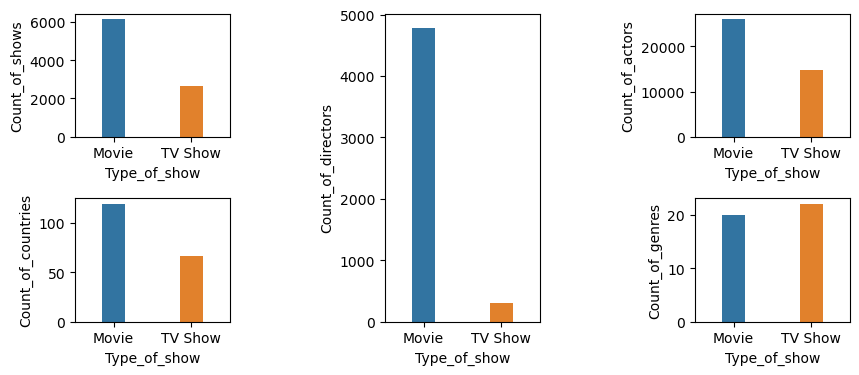

In [41]:
plt.figure(figsize=(10,4))

# Count of shows across Movies and TV shows
plt.subplot(2,3,1)
sns.barplot(data = cat_counts, x='type', y= 'title', width = 0.3)
plt.xlabel('Type_of_show')
plt.ylabel('Count_of_shows')

# Count of directors across Movies and TV shows
plt.subplot(1,3,2)
sns.barplot(data = cat_counts, x='type', y= 'director', width = 0.3)
plt.xlabel('Type_of_show')
plt.ylabel('Count_of_directors')

# Count of actors across Movies and TV shows
plt.subplot(2,3,3)
sns.barplot(data = cat_counts, x='type', y= 'cast', width = 0.3)
plt.xlabel('Type_of_show')
plt.ylabel('Count_of_actors')

# Count of countries across Movies and TV shows
plt.subplot(2,3,4)
sns.barplot(data = cat_counts, x='type', y= 'country', width = 0.3)
plt.xlabel('Type_of_show')
plt.ylabel('Count_of_countries')

# Count of genres across Movies and TV shows
plt.subplot(2,3,6)
sns.barplot(data = cat_counts, x='type', y= 'genre', width=0.3)
plt.xlabel('Type_of_show')
plt.ylabel('Count_of_genres')

# Adjust width and height of subplots
plt.subplots_adjust(wspace=1)
plt.subplots_adjust(hspace=0.5)
plt.show()

#####  Q2 Comparison of tv shows vs. movies.

###### Q2 (a) Find the number of movies produced in each country and pick the top 10 countries.

In [42]:
df['week_of_year'] = df['date_added'].dt.week

C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_1996\2879729068.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week_of_year'] = df['date_added'].dt.week


In [43]:
df['month_of_year'] = df['date_added'].dt.month

In [44]:
Movie_data =  df.loc[df['type']=='Movie']

In [45]:
TV_show_data =  df.loc[df['type']=='TV Show']

In [46]:
# As we have exploded a few columns there are more entries of the type too so we are seeing a much higher number of rows
Movie_data.shape

(145862, 14)

In [47]:
# As we have exploded a few columns there are more entries of the type too so we are seeing a much higher number of rows
TV_show_data.shape

(56148, 14)

In [48]:
Movie_count_countrywise = Movie_data.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index()
Movie_count_countrywise.head(10)

,country,title
0,United States,2752
1,India,962
2,United Kingdom,534
3,Unknown Country,440
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114


###### Q2 (b) Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [49]:
TV_show_count_countrywise = TV_show_data.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index()
TV_show_count_countrywise.head(10)

,country,title
0,United States,938
1,Unknown Country,391
2,United Kingdom,272
3,Japan,199
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66


In [50]:
# Lets analyze for the top 10 values across all major categories

top10_country = df['country'].value_counts().index[:10]
top10_data_c = df.loc[(df['country'].isin(top10_country))]

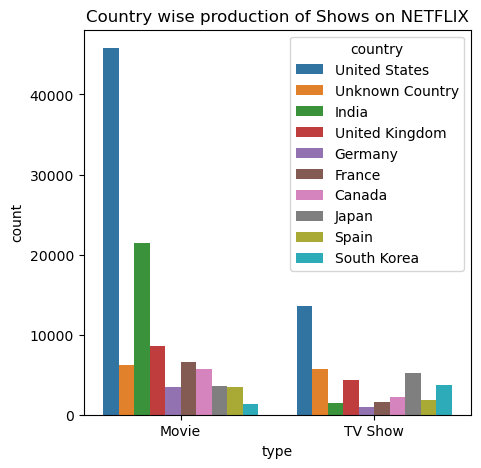

In [51]:
plt.figure(figsize=(5,5))
sns.countplot(data=top10_data_c, x= 'type', hue='country')

plt.title('Country wise production of Shows on NETFLIX')
plt.show()

##### Q3 What is the best time to launch a TV show?

###### Q3(a) Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [52]:
Movie_data.groupby('week_of_year')['title'].nunique().sort_values(ascending = False).head(10).reset_index()

,week_of_year,title
0,1,316
1,44,243
2,40,215
3,9,207
4,26,195
5,35,189
6,31,185
7,13,174
8,18,173
9,27,154


In [53]:
TV_show_data.groupby('week_of_year')['title'].nunique().sort_values(ascending = False).head(10).reset_index()

,week_of_year,title
0,27,86
1,31,83
2,13,76
3,44,75
4,24,75
5,35,74
6,5,73
7,26,73
8,40,72
9,50,70


###### Q3(b) Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [54]:
Movie_data.groupby('month_of_year')['title'].nunique().sort_values(ascending = False).reset_index()

,month_of_year,title
0,7,565
1,4,550
2,12,547
3,1,546
4,10,544
5,3,529
6,8,519
7,9,519
8,11,498
9,6,492


In [55]:
TV_show_data.groupby('month_of_year')['title'].nunique().sort_values(ascending = False).reset_index()

,month_of_year,title
0,12,266
1,7,262
2,9,251
3,6,236
4,8,236
5,10,215
6,4,214
7,3,213
8,11,207
9,1,202


In [56]:
# Lets analyze for the top 10 values across all major categories

top10_week = df['week_of_year'].value_counts().index[:10]
top10_data_w = df.loc[(df['week_of_year'].isin(top10_week))]

In [57]:
# Lets analyze for the top 5 values across all major categories

top10_month = df['month_of_year'].value_counts().index[:10]
top10_data_m = df.loc[(df['month_of_year'].isin(top10_month))]

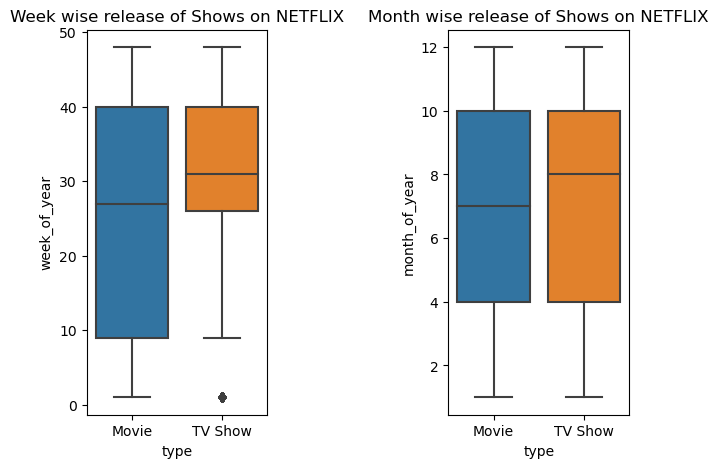

In [58]:
plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
sns.boxplot(data=top10_data_w, x='type', y='week_of_year')
plt.title('Week wise release of Shows on NETFLIX')

plt.subplot(1,2,2)
sns.boxplot(data=top10_data_m, x='type', y='month_of_year')
plt.title('Month wise release of Shows on NETFLIX')

plt.subplots_adjust(wspace=1)
plt.show()

##### Q4 Analysis of actors/directors of different types of shows/movies.

###### Q4(a) Identify the top 10 directors who have appeared in most movies or TV shows.

In [59]:
md = Movie_data.groupby('director')['title'].nunique().sort_values(ascending = False).reset_index()
md.head(10)

,director,title
0,Unknown Director,188
1,Rajiv Chilaka,22
2,Jan Suter,21
3,Raúl Campos,19
4,Suhas Kadav,16
5,Marcus Raboy,15
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Martin Scorsese,12
9,Jay Chapman,12


In [60]:
tv_d = TV_show_data.groupby('director')['title'].nunique().sort_values(ascending = False).reset_index()
tv_d.head(10)

,director,title
0,Unknown Director,2446
1,Ken Burns,3
2,Alastair Fothergill,3
3,Stan Lathan,2
4,Joe Berlinger,2
5,Hsu Fu-chun,2
6,Gautham Vasudev Menon,2
7,Iginio Straffi,2
8,Lynn Novick,2
9,Shin Won-ho,2


In [61]:
from wordcloud import WordCloud
all_directors_m = '-'.join(md['director'])
all_directors_tv = '-'.join(tv_d['director'])

In [62]:
wordcloud_m = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap='Set2',  # Specify a predefined colormap (e.g., 'viridis', 'coolwarm', 'Set2', etc.)
                      min_font_size=10).generate(all_directors_m)

wordcloud_tv = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap='Set2',  # Specify a predefined colormap (e.g., 'viridis', 'coolwarm', 'Set2', etc.)
                      min_font_size=10).generate(all_directors_tv)

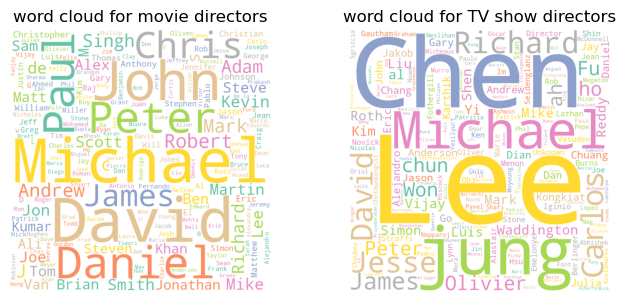

In [63]:
plt.figure(figsize=(6, 6), facecolor=None)
plt.subplot(1,2,1)
plt.imshow(wordcloud_m)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('word cloud for movie directors')

plt.subplot(1,2,2)
plt.imshow(wordcloud_tv)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('word cloud for TV show directors')

plt.subplots_adjust(wspace=0.3)
plt.show()

###### Q4(b) Identify the top 10 cast/actors who have appeared in most movies or TV shows.

In [64]:
mcast = Movie_data.groupby('cast')['title'].nunique().sort_values(ascending = False).reset_index()
mcast.head(10)

,cast,title
0,Unknown Cast,475
1,Anupam Kher,42
2,Shah Rukh Khan,35
3,Naseeruddin Shah,32
4,Om Puri,30
5,Akshay Kumar,30
6,Julie Tejwani,28
7,Amitabh Bachchan,28
8,Paresh Rawal,28
9,Rupa Bhimani,27


In [65]:
tvcast = TV_show_data.groupby('cast')['title'].nunique().sort_values(ascending = False).reset_index()
tvcast.head(10)

,cast,title
0,Unknown Cast,350
1,Takahiro Sakurai,25
2,Yuki Kaji,19
3,Daisuke Ono,17
4,Ai Kayano,17
5,Junichi Suwabe,17
6,Yuichi Nakamura,16
7,Jun Fukuyama,15
8,Yoshimasa Hosoya,15
9,David Attenborough,14


In [66]:
all_actors_m = '-'.join(mcast['cast'])
all_actors_tv = '-'.join(tvcast['cast'])

In [67]:
wordcloud_m1 = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap='Set2',  # Specify a predefined colormap (e.g., 'viridis', 'coolwarm', 'Set2', etc.)
                      min_font_size=10).generate(all_actors_m)

wordcloud_tv1 = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap='Set2',  # Specify a predefined colormap (e.g., 'viridis', 'coolwarm', 'Set2', etc.)
                      min_font_size=10).generate(all_actors_tv)

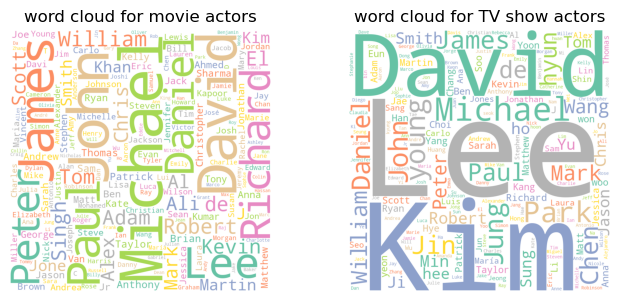

In [68]:
plt.figure(figsize=(6, 6), facecolor=None)
plt.subplot(1,2,1)
plt.imshow(wordcloud_m1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('word cloud for movie actors')

plt.subplot(1,2,2)
plt.imshow(wordcloud_tv1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title('word cloud for TV show actors')

plt.subplots_adjust(wspace=0.3)
plt.show()

##### Q5 Which genre movies are more popular or produced more

In [69]:
pop_gen = df['genre'].value_counts().index[:10]
top10_data_g = df.loc[(df['genre'].isin(pop_gen))]

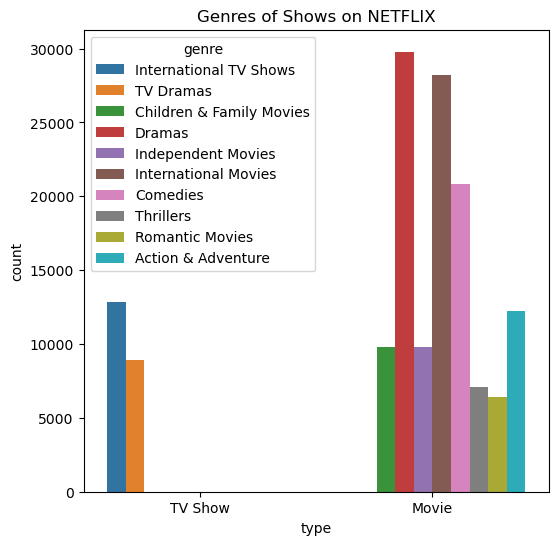

In [70]:
plt.figure(figsize=(6,6))
sns.countplot(data=top10_data_g, x= 'type', hue='genre')
plt.title('Genres of Shows on NETFLIX')
plt.show()

In [71]:
from wordcloud import WordCloud
all_genres = '-'.join(df['genre'])

In [72]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      colormap='coolwarm',  # Specify a predefined colormap (e.g., 'viridis', 'coolwarm', 'Set2', etc.)
                      min_font_size=10).generate(all_genres)

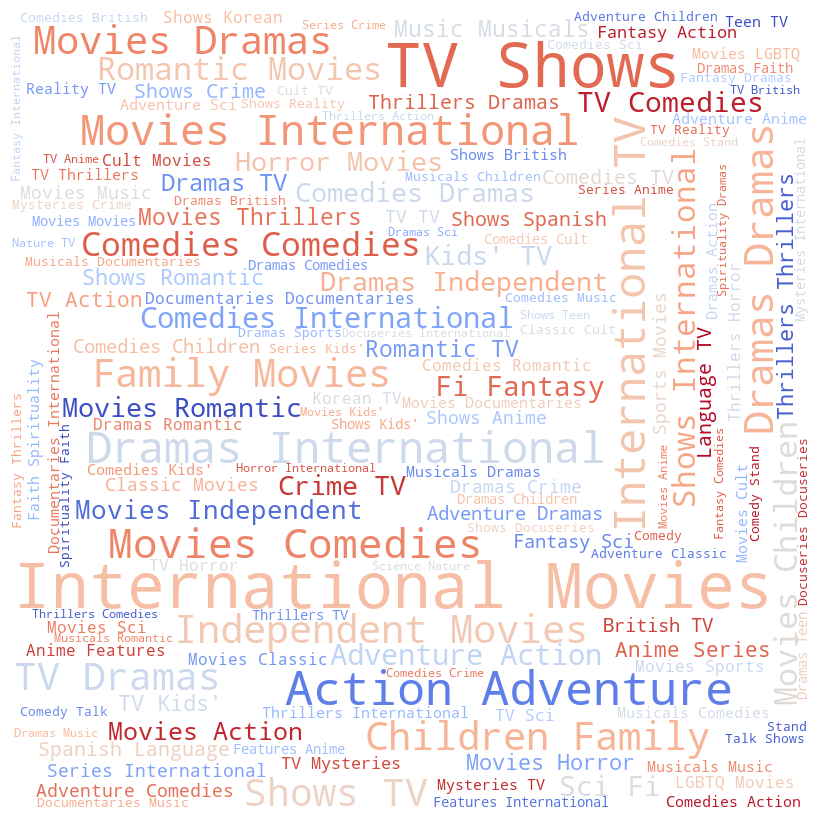

In [73]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

###### Q6 Find After how many days the movie will be added to Netflix after the release of the movie (you can consider the recent past data)

In [74]:
df['diff_date'] = (df['date_added'] - df['release_year']).dt.days
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202010 entries, 0 to 202064
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   show_id        202010 non-null  object        
 1   type           202010 non-null  object        
 2   title          202010 non-null  object        
 3   director       202010 non-null  object        
 4   cast           202010 non-null  object        
 5   country        202010 non-null  object        
 6   date_added     202010 non-null  datetime64[ns]
 7   release_year   202010 non-null  datetime64[ns]
 8   rating         202010 non-null  object        
 9   duration       202010 non-null  object        
 10  description    202010 non-null  object        
 11  genre          202010 non-null  object        
 12  week_of_year   202010 non-null  int64         
 13  month_of_year  202010 non-null  int64         
 14  diff_date      202010 non-null  int64         
dtype

In [75]:
top10_diff = df['diff_date'].value_counts().index[:10]
top10_data_diff = df.loc[(df['diff_date'].isin(top10_diff))]

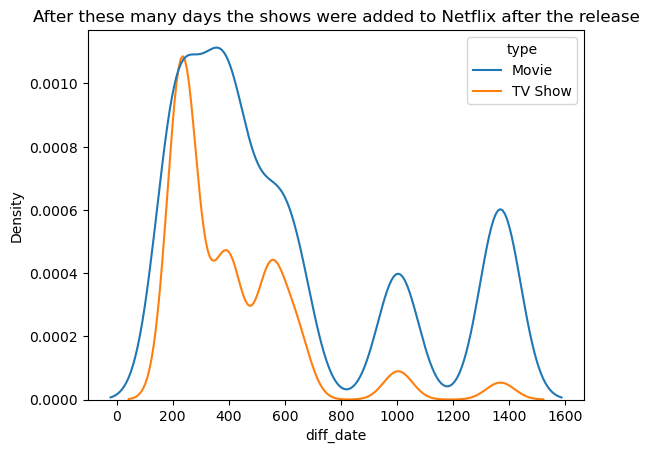

In [76]:
sns.kdeplot(data = top10_data_diff, x ='diff_date', hue = 'type')
plt.title('After these many days the shows were added to Netflix after the release')
plt.show()

##### Q7. How much duration of movies were launched

In [77]:
# extracted duration from movies table and converted those string minutes values to integer

movie_dur_series = Movie_data['duration']
modified_movie_dur = movie_dur_series.str.replace('min', '')
modified_movie_dur = pd.to_numeric(modified_movie_dur)

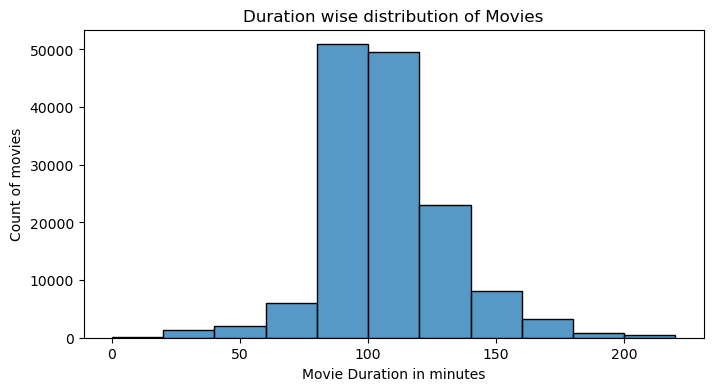

In [78]:
plt.figure(figsize=(8,4))

sns.histplot(data = modified_movie_dur, bins = [0,20, 40,60, 80, 100, 120, 140, 160, 180, 200, 220])
plt.title('Duration wise distribution of Movies')
plt.xlabel('Movie Duration in minutes')
plt.ylabel('Count of movies')

plt.show()

#####  Q8 Corelation with various numeric data types

In [79]:
df1 = df

In [80]:
df1['release_year'] =  df['release_year'].dt.year
df1['release_year'] =  pd.to_numeric(df['release_year'])

In [81]:
df1['date_added'] =  df['date_added'].dt.year
df1['date_added'] =  pd.to_numeric(df['date_added'])

In [82]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202010 entries, 0 to 202064
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   show_id        202010 non-null  object
 1   type           202010 non-null  object
 2   title          202010 non-null  object
 3   director       202010 non-null  object
 4   cast           202010 non-null  object
 5   country        202010 non-null  object
 6   date_added     202010 non-null  int64 
 7   release_year   202010 non-null  int64 
 8   rating         202010 non-null  object
 9   duration       202010 non-null  object
 10  description    202010 non-null  object
 11  genre          202010 non-null  object
 12  week_of_year   202010 non-null  int64 
 13  month_of_year  202010 non-null  int64 
 14  diff_date      202010 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 24.7+ MB


In [83]:
top5_director = df1['director'].value_counts().index[:5]
top5_genre = df1['genre'].value_counts().index[:5]
top5_cast = df1['cast'].value_counts().index[:5]
top5_country = df1['country'].value_counts().index[:5]
top5_rating = df1['rating'].value_counts().index[:5]
top5_data = df1.loc[(df1['director'].isin(top5_director)) 
                   & (df1['genre'].isin(top5_genre)) 
                   & (df1['cast'].isin(top5_cast))
                  & (df1['country'].isin(top5_country))
                  & (df1['rating'].isin(top5_rating))]
top5_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,description,genre,week_of_year,month_of_year,diff_date
355,s11,TV Show,"Vendetta: Truth, Lies and The Mafia",Unknown Director,Unknown Cast,Unknown Country,2021,2021,TV-MA,1 Season,"Sicily boasts a bold ""Anti-Mafia"" coalition. B...",International TV Shows,38,9,266
1715,s70,TV Show,Stories by Rabindranath Tagore,Unknown Director,Unknown Cast,India,2021,2015,TV-PG,1 Season,The writings of Nobel Prize winner Rabindranat...,International TV Shows,37,9,2449
5504,s225,TV Show,Motel Makeover,Unknown Director,Unknown Cast,Unknown Country,2021,2021,TV-14,1 Season,"Amid project pitfalls and a pandemic, besties-...",International TV Shows,34,8,236
5740,s243,TV Show,Comedy Premium League,Unknown Director,Unknown Cast,Unknown Country,2021,2021,TV-MA,1 Season,"With satirical sketches, cheeky debates and bl...",International TV Shows,33,8,231
6217,s267,TV Show,The Creative Indians,Unknown Director,Unknown Cast,India,2021,2020,TV-MA,1 Season,From chefs and comedians to filmmakers and fas...,International TV Shows,32,8,592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181210,s7958,Movie,Schindler's List,Steven Spielberg,Liam Neeson,United States,2018,1993,R,195 min,Oskar Schindler becomes an unlikely humanitari...,Dramas,13,4,9221
185010,s8110,TV Show,Strongland,Unknown Director,Unknown Cast,Unknown Country,2019,2018,TV-PG,1 Season,From Spain's countryside to Scotland's stony t...,International TV Shows,3,1,382
189432,s8269,Movie,The Darkest Dawn,Unknown Director,Unknown Cast,United Kingdom,2018,2016,TV-MA,75 min,An aspiring filmmaker records the chaos of an ...,Action & Adventure,25,6,904
189434,s8269,Movie,The Darkest Dawn,Unknown Director,Unknown Cast,United Kingdom,2018,2016,TV-MA,75 min,An aspiring filmmaker records the chaos of an ...,International Movies,25,6,904


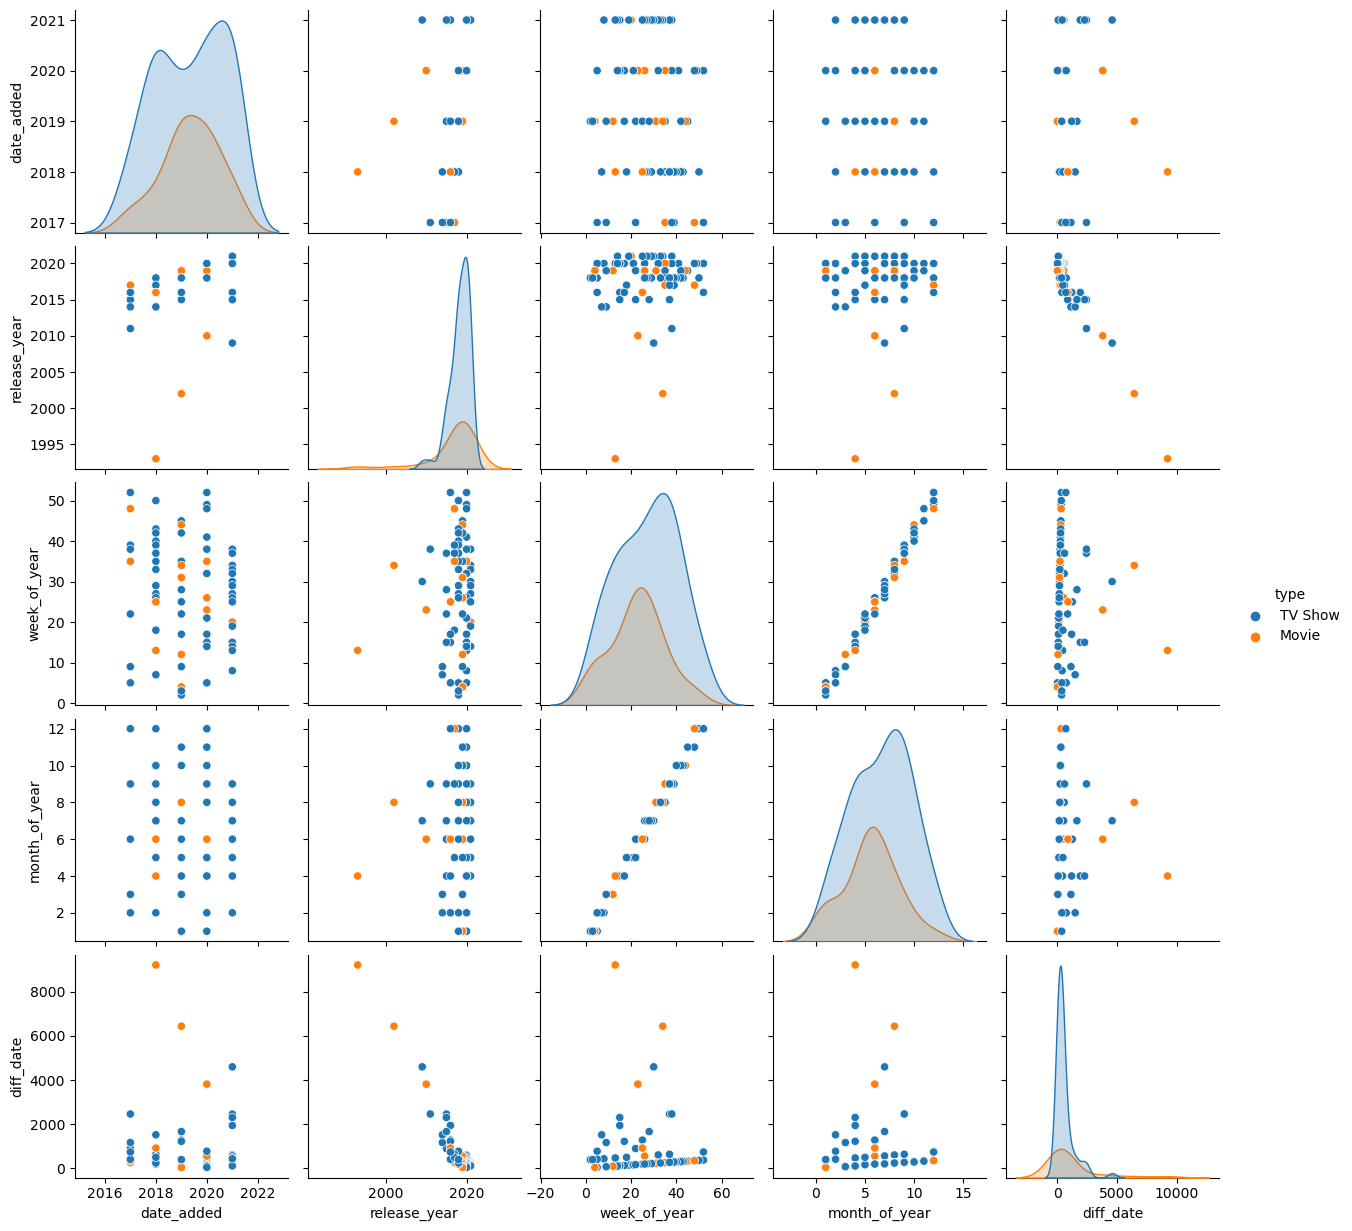

In [84]:
sns.pairplot(data=top5_data, hue = 'type')

C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_1996\2850829254.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top5_data.corr(), annot = True)


<Axes: >

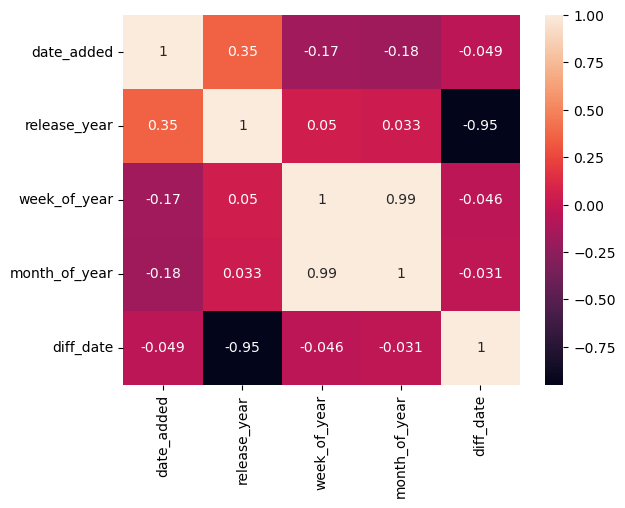

In [85]:
sns.heatmap(top5_data.corr(), annot = True)

###### Q9. Yearly launching of movies/ TV shows

In [86]:
df_copy = df1[['type', 'title' ,'date_added', 'release_year', 'country', 'genre']]
df_copy

,type,title,date_added,release_year,country,genre
0,Movie,Dick Johnson Is Dead,2021,2020,United States,Documentaries
1,TV Show,Blood & Water,2021,2021,South Africa,International TV Shows
2,TV Show,Blood & Water,2021,2021,South Africa,TV Dramas
3,TV Show,Blood & Water,2021,2021,South Africa,TV Mysteries
4,TV Show,Blood & Water,2021,2021,South Africa,International TV Shows
...,...,...,...,...,...,...
202060,Movie,Zubaan,2019,2015,India,International Movies
202061,Movie,Zubaan,2019,2015,India,Music & Musicals
202062,Movie,Zubaan,2019,2015,India,Dramas
202063,Movie,Zubaan,2019,2015,India,International Movies


In [87]:
df_copy.drop_duplicates(['type', 'title'], inplace = True)

C:\Users\Nisha Pandit\AppData\Local\Temp\ipykernel_1996\1589486977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy.drop_duplicates(['type', 'title'], inplace = True)


In [88]:
df_copy_m = df_copy.loc[df_copy['type']=='Movie']
df_copy_tv = df_copy.loc[df_copy['type']=='TV Show']

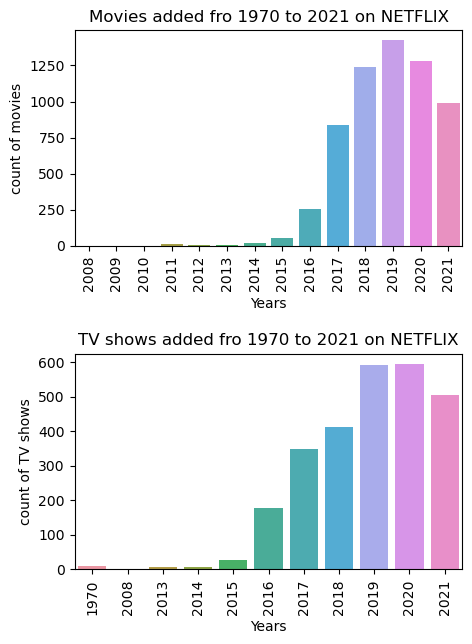

In [89]:
plt.figure(figsize=(5,7))
plt.subplot(2,1,1)
yearly_counts = df_copy_m['date_added'].value_counts().sort_index()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.xticks(rotation = 90)
plt.title('Movies added fro 1970 to 2021 on NETFLIX')
plt.xlabel('Years')
plt.ylabel('count of movies')

plt.subplot(2,1,2)
yearly_counts = df_copy_tv['date_added'].value_counts().sort_index()
sns.barplot(x=yearly_counts.index, y=yearly_counts.values)
plt.xticks(rotation = 90)
plt.title('TV shows added fro 1970 to 2021 on NETFLIX')
plt.xlabel('Years')
plt.ylabel('count of TV shows')

plt.subplots_adjust(hspace=0.5)
plt.show()

##### Q10 Which rating is given to a maximum number of shows?

In [90]:
df2 = df

In [91]:
rating_data = df2.groupby('rating').nunique().reset_index()
rating_data = rating_data.sort_values(by='title', ascending=False)

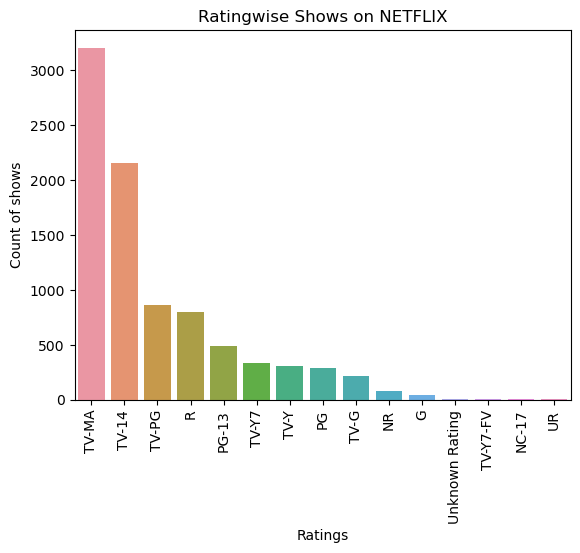

In [92]:
sns.barplot(data = rating_data, x = 'rating', y = 'title')
plt.xticks(rotation = 90)
plt.title('Ratingwise Shows on NETFLIX')
plt.xlabel('Ratings')
plt.ylabel('Count of shows')
plt.show()